In [16]:
import warnings
from importlib import reload

import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud

import acquire as a
import explore_helper as e
import prepare as p
import wrangle as w
from env import get_db_url

In [7]:
warnings.simplefilter("ignore")

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [8]:
df = pd.read_csv('data/spam.csv',index_col=0)
df.head()

,id,label,text
0,0,ham,"Go until jurong point, crazy.. Available only ..."
1,1,ham,Ok lar... Joking wif u oni...
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,ham,U dun say so early hor... U c already then say...
4,4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
reload(p)
df = p.prep_df_for_nlp(df,'text',extra_words=['r','u','2','4',"'"])
df.head()

,id,label,text,clean,stem,lemmatized
0,0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,go jurong point crazi avail bugi n great world...,go jurong point crazy available bugis n great ...
1,1,ham,Ok lar... Joking wif u oni...,ok lar joking wif oni,ok lar joke wif oni,ok lar joking wif oni
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts 21s...,free entri wkli comp win fa cup final tkt 21st...,free entry wkly comp win fa cup final tkts 21s...
3,3,ham,U dun say so early hor... U c already then say...,dun say early hor c already say,dun say earli hor c alreadi say,dun say early hor c already say
4,4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though,nah think goe usf live around though,nah think go usf life around though


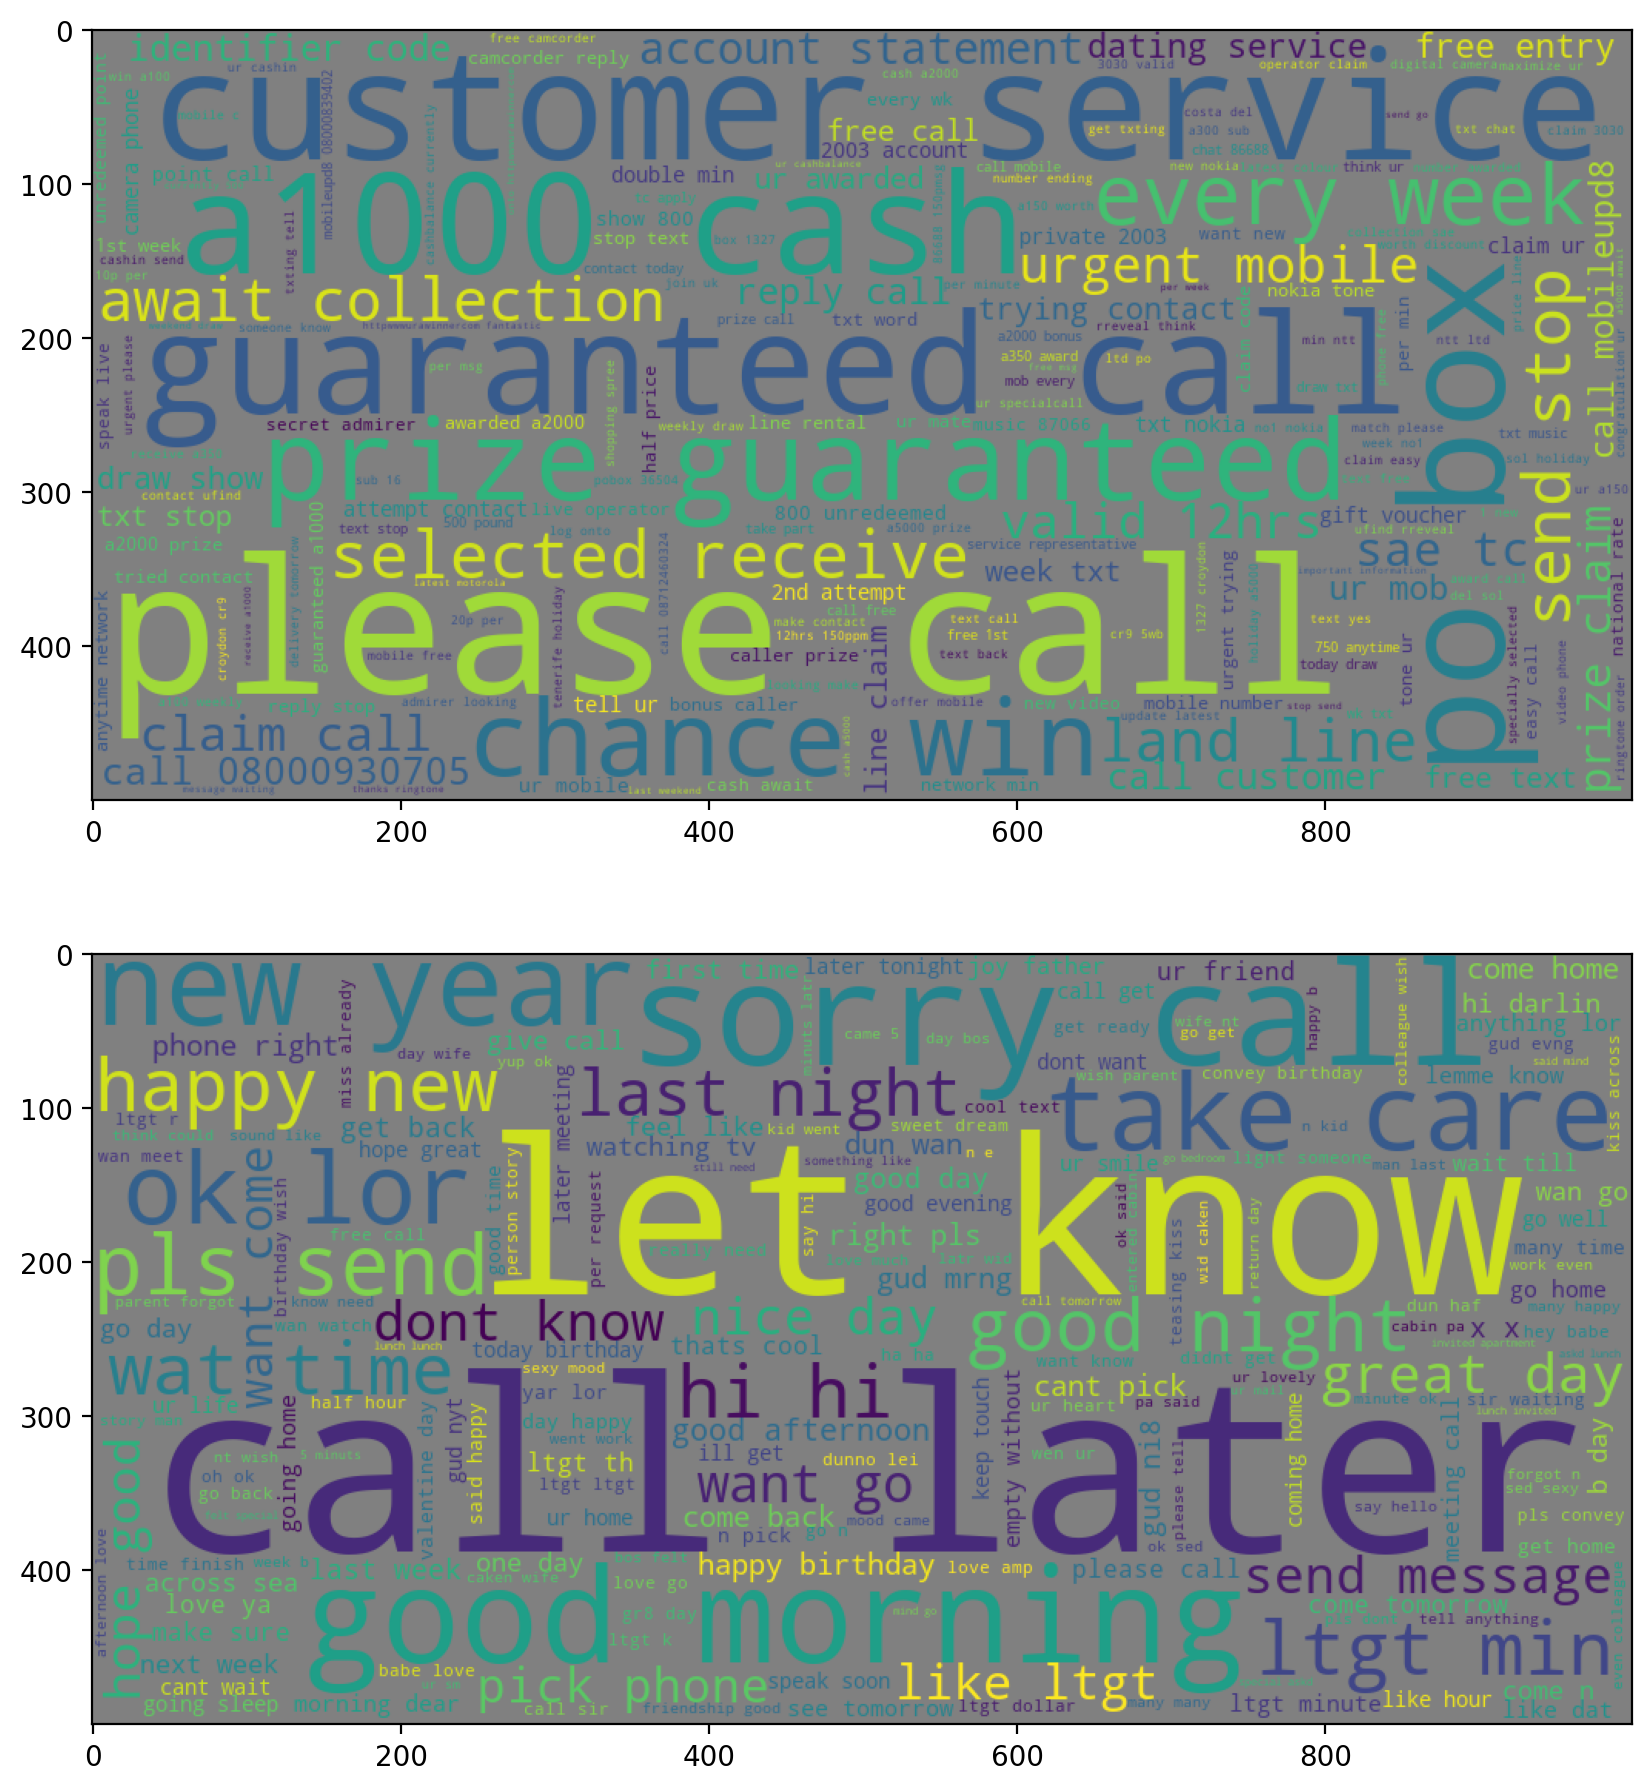

In [10]:
spam = df[df.label == 'spam']
ham = df[df.label == 'ham']
spam_words = ' '.join(spam.lemmatized)
ham_words = ' '.join(ham.lemmatized)
spam_bigrams = list(nltk.ngrams(spam_words.split(),2))
ham_bigrams = list(nltk.ngrams(ham_words.split(),2))
spam_freq = pd.Series(spam_bigrams).value_counts()
ham_freq = pd.Series(ham_bigrams).value_counts()
spam_bigram_freq = {k[0] + ' ' + k[1]: v for k,v in spam_freq.to_dict().items()}
ham_bigram_freq = {k[0] + ' ' + k[1]: v for k,v in ham_freq.to_dict().items()}
spam_cloud = WordCloud(background_color='grey',width=1000,height=500).generate_from_frequencies(spam_bigram_freq)
ham_cloud = WordCloud(background_color='grey',width=1000,height=500).generate_from_frequencies(ham_bigram_freq)
fig, axs = plt.subplots(2,1,figsize=(10,11))
axs[0].imshow(spam_cloud)
axs[1].imshow(ham_cloud)
plt.show()

In [11]:
spam_set = {s[0] + ' ' + s[1] for s in spam_freq.head(55).index}
ham_set = {s[0] + ' ' + s[1] for s in ham_freq.head(55).index}
spam_set.intersection(ham_set)


{'please call'}

## Takeaways:
- Overlapping phrases:
    - "please call"
    

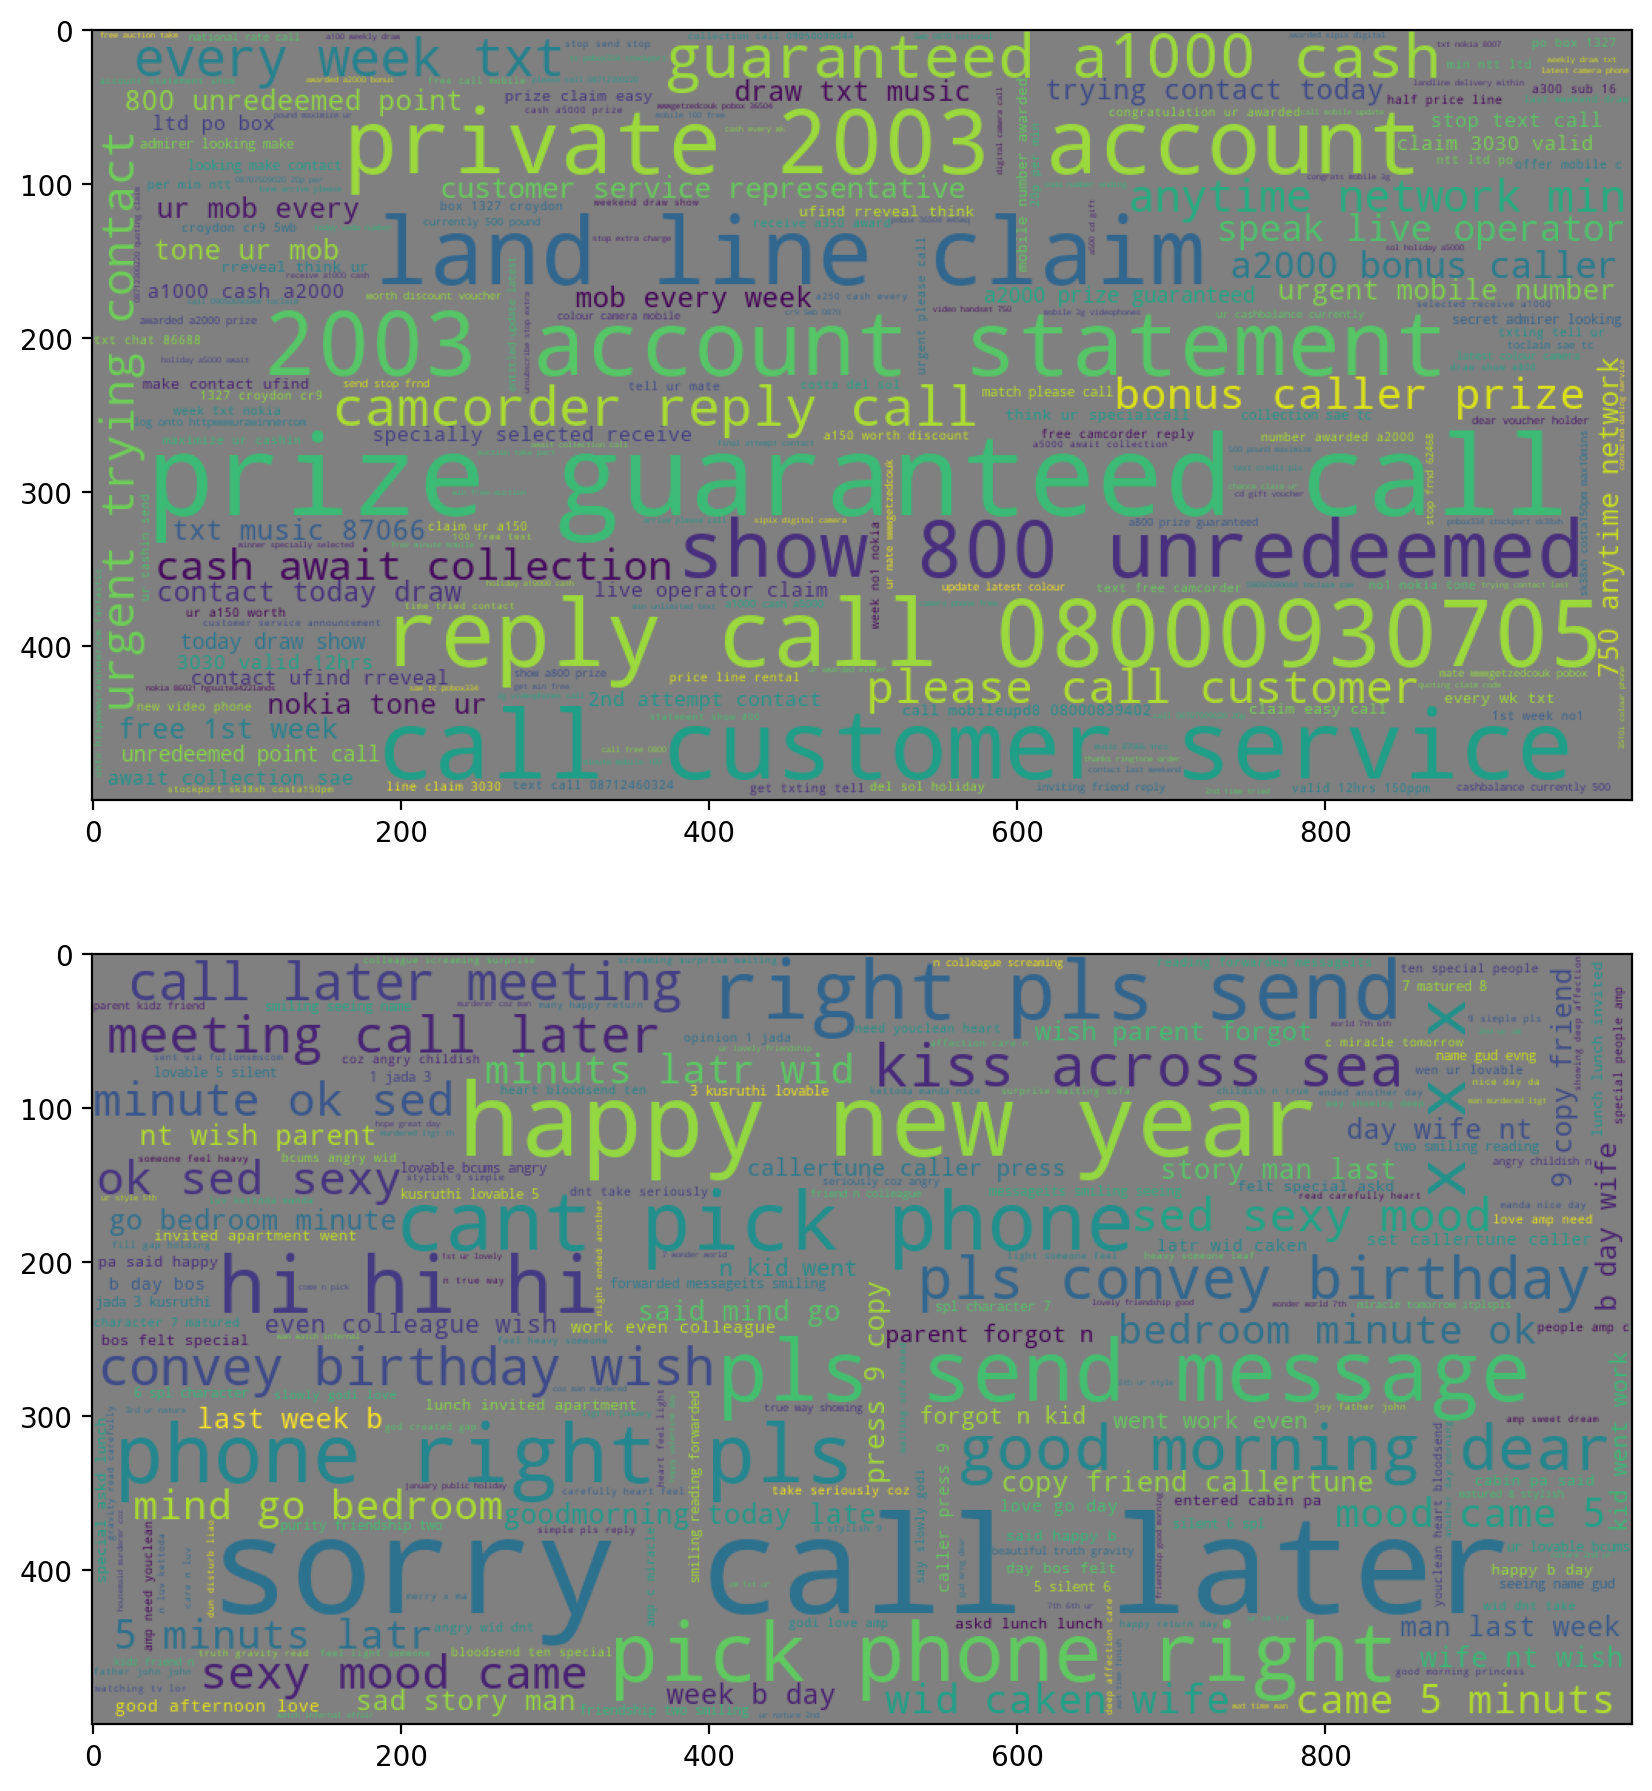

In [12]:
spam_trigrams = list(nltk.ngrams(spam_words.split(),3))
ham_trigrams = list(nltk.ngrams(ham_words.split(),3))
spam_freq = pd.Series(spam_trigrams).value_counts()
ham_freq = pd.Series(ham_trigrams).value_counts()
spam_trigram_freq = {k[0] + ' ' + k[1] + ' ' +  k[2]: v for k,v in spam_freq.to_dict().items()}
ham_trigram_freq = {k[0] + ' ' + k[1] +  ' ' + k[2]: v for k,v in ham_freq.to_dict().items()}
spam_cloud = WordCloud(background_color='grey',width=1000,height=500).generate_from_frequencies(spam_trigram_freq)
ham_cloud = WordCloud(background_color='grey',width=1000,height=500).generate_from_frequencies(ham_trigram_freq)
fig, axs = plt.subplots(2,1,figsize=(10,11))
axs[0].imshow(spam_cloud)
axs[1].imshow(ham_cloud)
plt.show()

In [13]:
spam_set = {s[0] + ' ' + s[1] for s in spam_freq.head(100).index}
ham_set = {s[0] + ' ' + s[1] for s in ham_freq.head(100).index}
spam_set.intersection(ham_set)


set()

No noteable overlap

In [33]:
reload(w)
codeup_df = w.wrangle_codeup_blog()
article_df = w.wrangle_inshort_articles()

In [32]:


inshorts_bigrams =e.get_ngram_frequency(article_df.lemmatized,2)
inshorts_bigrams

sri lanka             33
first odi             27
world cup             22
virat kohli           20
took twitter          12
                      ..
moved headquarters     1
tesla moved            1
texas tesla            1
western texas          1
rahul actor            1
Length: 6315, dtype: int64

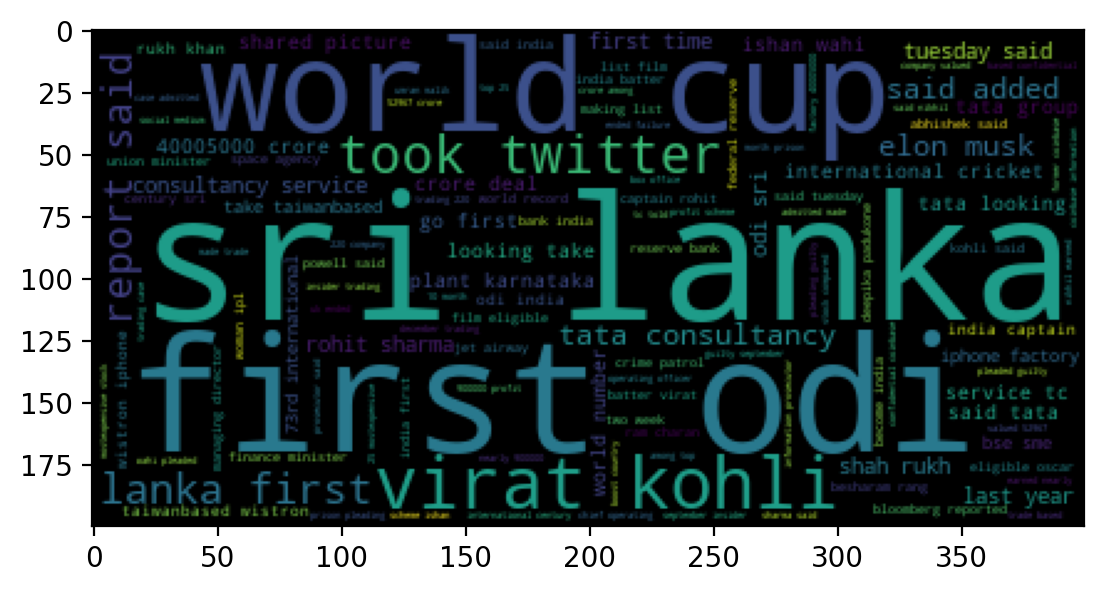

In [31]:

e.generate_word_cloud(article_df.lemmatized,2)

In [34]:
cats = []
for category in article_df.category.unique():
    cat = article_df[article_df.category == category].lemmatized
    cats.append(e.get_ngram_frequency(cat))


category    text                                                                                                                                                                                                                                                                                                                                                                                                            headline                                                              clean                                                                                                                                                                                                                                                                                                                stem                                                                                                                                                                                                             

14400